## Задания по теме «Библиотеки Python для визуализации данных»

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
import plotly.express as px

Откроем файл, посмотрим основную информацию и первые 5 строк.

In [2]:
# откроем файл и выведем первые 5 строк
from io import BytesIO
import requests
spreadsheet_id = '11OfZkXSrcYY7mRH2Wy8AxzNP8nGe1RczYCJFwl1EuSM'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), object(13)
memory usage: 296.4+ KB


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",TRUE


Заменим названия стобцов

In [3]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]

Проверим дубликаты

In [4]:
df.duplicated().sum()

12

Удалим дубликаты

In [5]:
df.drop_duplicates().reset_index(drop=True)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",TRUE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global\n4.5,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
2512,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services\n2.9,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1
2513,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions\n3.7,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
2514,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity\n\nCharles Schwab & Co., Inc ...",3.5,Schwab\n3.5,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,-1,Unknown / Non-Applicable,-1,-1


Цветовая палитра hh.ru

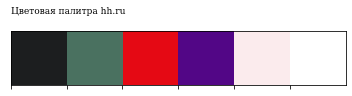

In [6]:
# Palette
sns.palplot(['#1c1e1f', '#4a7160', '#e50914', '#520686', '#fbebed', '#ffffff'])
colors = ['#4a7160', '#e50914','#520686', '#fbebed']
sns.set_palette(sns.color_palette(colors))
plt.title("Цветовая палитра hh.ru", loc='left',fontfamily='serif',fontsize=9,y=1.2)
plt.show()

### Построить график компаний с самым большим количеством вакансий

Извлечем названия компания из столбца `company_name`.

In [7]:
# функция для отбора названия компаний
def company(name):
  return name.partition('\n')[0]

df['company_name'] = df['company_name'].apply(company)
  

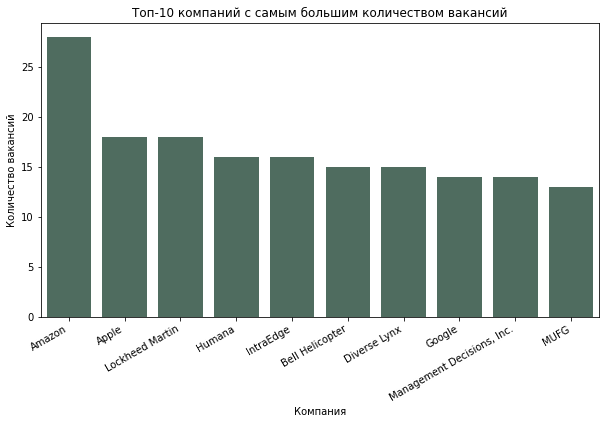

In [8]:
# строим график для топ-10 компаний
data = df['company_name'].value_counts()[:10].reset_index()
data.columns = ['company', 'numbers']

plt.figure(figsize=(10,6))
sns.barplot(x='company', y='numbers', data=data, orient='v', color='#4a7160')
plt.title('Топ-10 компаний с самым большим количеством вакансий')
plt.xlabel('Компания')
plt.ylabel('Количество вакансий')
plt.gcf().autofmt_xdate();

### Построить график самых популярных названий в вакансиях

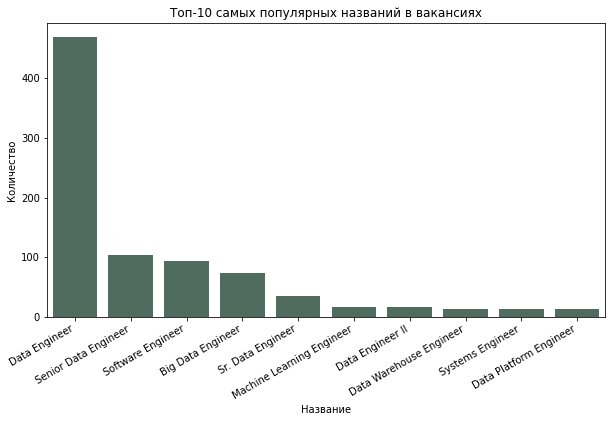

In [9]:
# строим график для топ-10 популярных названий в вакансиях
data = df['job_title'].value_counts()[:10].reset_index()
data.columns = ['job', 'numbers']

plt.figure(figsize=(10,6))
sns.barplot(x='job', y='numbers', data=data, orient='v', color='#4a7160')
plt.title('Топ-10 самых популярных названий в вакансиях')
plt.xlabel('Название')
plt.ylabel('Количество')
plt.gcf().autofmt_xdate();

### Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

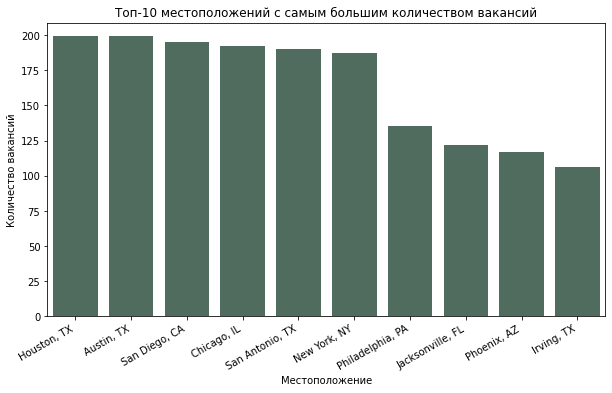

In [10]:
# строим график самых популярных местоположений вакансий
data = df['location'].value_counts()[:10].reset_index()
data.columns = ['location', 'numbers']

plt.figure(figsize=(10,6))
sns.barplot(x='location', y='numbers', data=data, orient='v', color='#4a7160')
plt.title('Топ-10 местоположений с самым большим количеством вакансий')
plt.xlabel('Местоположение')
plt.ylabel('Количество вакансий')
plt.gcf().autofmt_xdate();

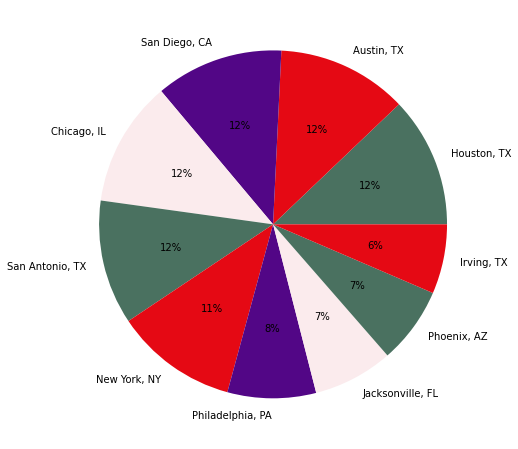

In [11]:
# строим круговую диаграмму для самых популярных местоположений
data_numbers = data.numbers.to_list()
labels = data.location.to_list()

plt.figure(figsize=(8,8))
plt.pie(data_numbers, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Построить график популярности по колонке Type of ownership, относительно численности вакансий

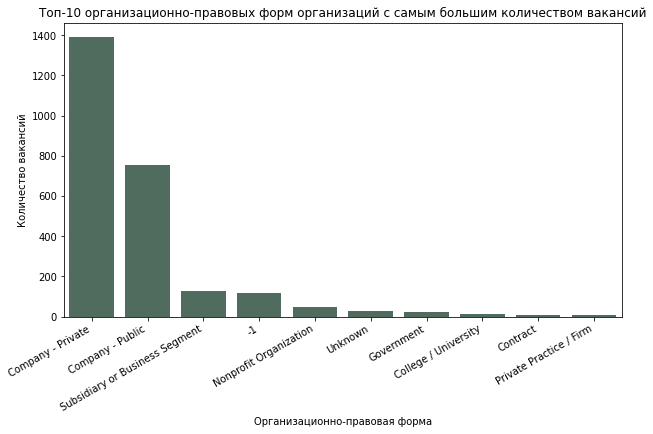

In [12]:
# строим график популярности по колонке Type of ownership
data = df['type_of_ownership'].value_counts()[:10].reset_index()
data.columns = ['type_of_ownership', 'numbers']

plt.figure(figsize=(10,6))
sns.barplot(x='type_of_ownership', y='numbers', data=data, orient='v', color='#4a7160')
plt.title('Топ-10 организационно-правовых форм организаций с самым большим количеством вакансий')
plt.xlabel('Организационно-правовая форма')
plt.ylabel('Количество вакансий')
plt.gcf().autofmt_xdate();

### Построить график популярности по секторам работы

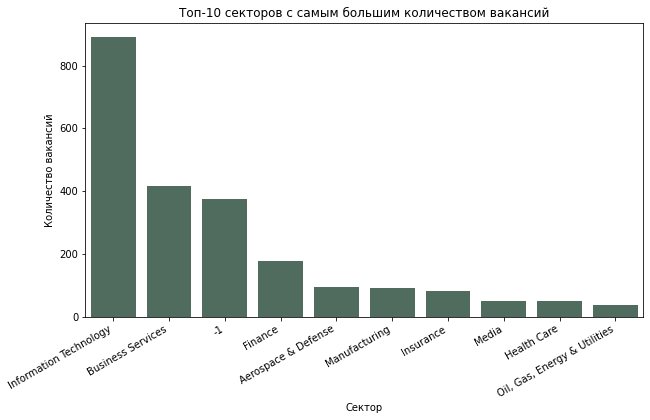

In [13]:
# строим график популярности по секторам работы (-1 - нет данных)
data = df['sector'].value_counts()[:10].reset_index()
data.columns = ['sector', 'numbers']

plt.figure(figsize=(10,6))
sns.barplot(x='sector', y='numbers', data=data, orient='v', color='#4a7160')
plt.title('Топ-10 секторов с самым большим количеством вакансий')
plt.xlabel('Сектор')
plt.ylabel('Количество вакансий')
plt.gcf().autofmt_xdate();

### Построить график используя сектора работы и средний уровень зарплат в них

In [14]:
# функция для расчета средней зарплаты в колонке salary_estimate
def company(salary):
  return (int(salary.partition('-')[0][1:-1]) + int(salary.partition('-')[2][1:-18]))/2

df['salary_estimate'] = df['salary_estimate'].apply(company)
  

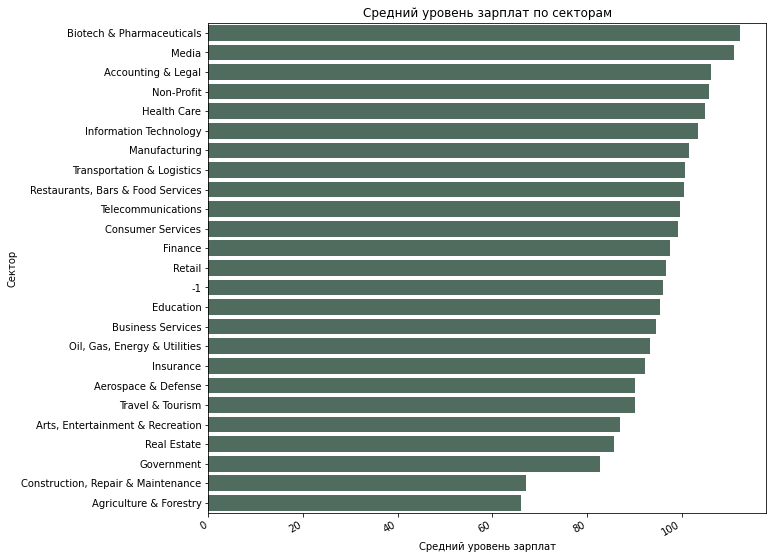

In [15]:
# строим график средних уровннй зарплат по секторам
data = df.groupby('sector').agg({'salary_estimate' : np.mean}).reset_index()
data.columns = ['sector', 'salary']

plt.figure(figsize=(10,10))
sns.barplot(x='salary', y='sector', data=data, orient='h', color='#4a7160', order = data.sort_values('salary',ascending = False).sector)
plt.title('Средний уровень зарплат по секторам')
plt.xlabel('Средний уровень зарплат')
plt.ylabel('Сектор')
plt.gcf().autofmt_xdate();

### Построить гистограмму распределения рейтинга компаний

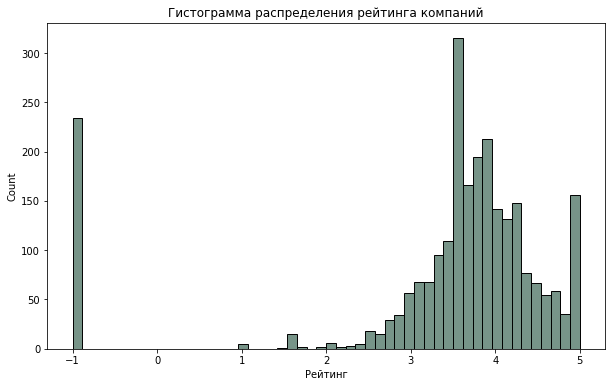

In [16]:
# строим гистограмму распределения рейтинга компаний (-1 - нет данных)
plt.figure(figsize=(10,6));
sns.histplot(data=df, x="rating", color='#4a7160');
plt.title('Гистограмма распределения рейтинга компаний');
plt.xlabel('Рейтинг');

### Построить график средних зарплат по популярным компаниям

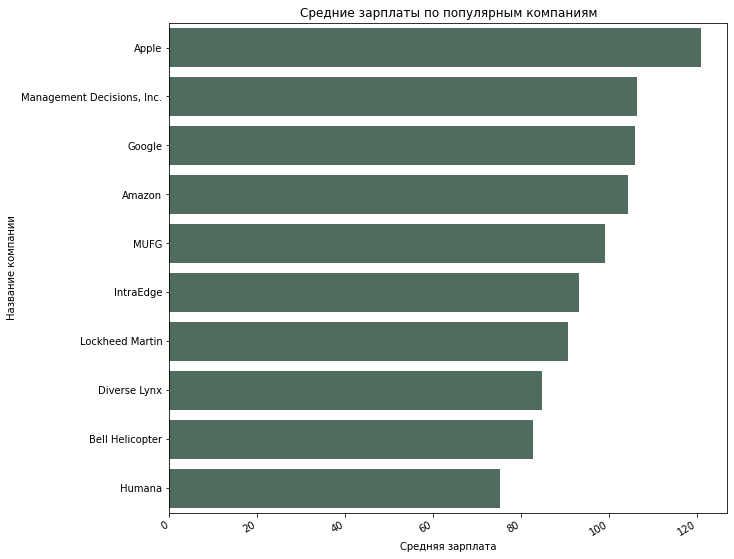

In [17]:
# строим график средних зарплат по популярным компаниям
data = df.groupby('company_name').agg({'rating': 'count', 'salary_estimate' : np.mean}).sort_values('rating', ascending = False)[:10].reset_index()
data.columns = ['company_name', 'numbers', 'salary']

plt.figure(figsize=(10,10))
sns.barplot(x='salary', y='company_name', data=data, orient='h', color='#4a7160', order = data.sort_values('salary',ascending = False).company_name)
plt.title('Средние зарплаты по популярным компаниям')
plt.xlabel('Средняя зарплата')
plt.ylabel('Название компании')
plt.gcf().autofmt_xdate();

### Построить по описанию вакансий облако тегов, исследовать самые популярные слова

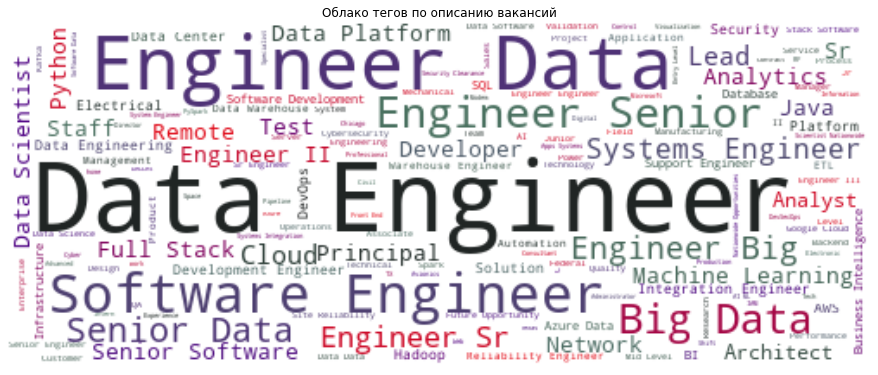

In [18]:
# строим облако тегов по описанию вакансий
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#1c1e1f', '#4a7160', '#520686', '#e50914'])

text = str(list(df['job_title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(12,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Облако тегов по описанию вакансий')
plt.show()